<br>
<h1 style = "font-size:35px; font-family:cursive ; font-weight : bold; color : #AA3073; text-align: center; border-radius: 10px 100px;">Zomato Bangalore Restaurants 🍜🥂 </h1>
<br>

![](https://im.whatshot.in/img/2018/Dec/skyee-is-1545640792.jpg)

**Bangalore** officially known as Bengaluru is the capital and the largest city of the Indian state of Karnataka. It has a population of more than 8 million and a metropolitan population of around 11 million, making it the third most populous city and fifth most populous urban agglomeration in India.Located in southern India on the Deccan Plateau, at a height of over 900 m (3,000 ft) above sea level, Bangalore is known for its pleasant climate throughout the year. Its elevation is the highest among the major cities of India.
Bangalore is widely regarded as the "Silicon Valley of India" (or "IT capital of India") because of its role as the nation's leading information technology (IT) exporter.Indian technological organisations are headquartered in the city. A demographically diverse city, Bangalore is the second fastest-growing major metropolis in India.

**Zomato** is an Indian multinational restaurant aggregator and food delivery company founded by Pankaj Chaddah and Deepinder Goyal in 2008.Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.As of 2019, the service is available in 24 countries and in more than 10,000 cities.

### About the Data:
- url : This feature contains the url of the restaurant on the Zomato website
- address : This feature contains the address of the restaurant in Bangalore
- name : This feature contains the name of the restaurant
- online_order : whether online ordering is available in the restaurant or not
- book_table : table book option available or not
- rate : contains the overall rating of the restaurant out of 5
- votes : contains total number of upvotes for the restaurant
- phone : contains the phone number of the restaurant
- location : contains the neighborhood in which the restaurant is located
- rest_type : restaurant type
- dish_liked : dishes people liked in the restaurant
- cuisines : food styles, separated by comma
- approx_cost(for two people) : contains the approximate cost of meal for two people
- reviews_list : list of tuples containing reviews for the restaurant, each tuple consists of two values, rating and review by the customer
- menu_item : contains list of menus available in the restaurant
- listed_in(type) : type of meal
- listed_in(city) : contains the neighborhood in which the restaurant is located

In [1]:
from IPython.display import HTML
HTML("""
<style>
h1,h2,h3 {
	margin: 1em 0 0.5em 0;
	font-weight: 600;
	font-family: 'Titillium Web', sans-serif;
	position: relative;  
	font-size: 36px;
	line-height: 40px;
	padding: 15px 15px 15px 2.5%;
	color: #13003A;
	box-shadow: 
		inset 0 0 0 1px rgba(53,86,129, 1), 
		inset 0 0 5px rgba(53,86,129, 1),
		inset -285px 0 35px white;
	border-radius: 0 10px 0 15px;
	background: #fff
    
}
</style>
""")

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/zomato-bangalore-restaurants/zomato.csv


<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">✅ Importing Required Libraries</h1>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from geopy.geocoders import Nominatim
import folium
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
from plotly import tools
import re
from plotly.offline import init_notebook_mode, plot, iplot
from wordcloud import WordCloud, STOPWORDS 
from warnings import filterwarnings
filterwarnings('ignore')

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">🔍Basic Data Exploration:</h1>

In [4]:
df=pd.read_csv("../input/zomato-bangalore-restaurants/zomato.csv")
df.head()

url  \
0  https://www.zomato.com/bangalore/jalsa-banasha...   
1  https://www.zomato.com/bangalore/spice-elephan...   
2  https://www.zomato.com/SanchurroBangalore?cont...   
3  https://www.zomato.com/bangalore/addhuri-udupi...   
4  https://www.zomato.com/bangalore/grand-village...   

                                             address                   name  \
0  942, 21st Main Road, 2nd Stage, Banashankari, ...                  Jalsa   
1  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
2  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
3  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
4  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   

  online_order book_table   rate  votes                             phone  \
0          Yes        Yes  4.1/5    775    080 42297555\r\n+91 9743772233   
1          Yes         No  4.1/5    787                      080 41714161   
2          Yes         No  3.8/5    918                    +91 9663487993   
3           No         No  3.7/5     88                    +91 9620009302   
4           No         No  3.8/5    166  +91 8026612447\r\n+91 9901210005   

       location            rest_type  \
0  Banashankari        Casual Dining   
1  Banashankari        Casual Dining   
2  Banashankari  Cafe, Casual Dining   
3  Banashankari          Quick Bites   
4  Basavanagudi        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_cost(for two people)  \
0  North Indian, Mughlai, Chinese                         800   
1     Chinese, North Indian, Thai                         800   
2          Cafe, Mexican, Italian                         800   
3      South Indian, North Indian                         300   
4        North Indian, Rajasthani                         600   

                                        reviews_list menu_item  \
0  [('Rated 4.0', 'RATED\n  A beautiful place to ...        []   
1  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
2  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
3  [('Rated 4.0', "RATED\n  Great food and proper...        []   
4  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   

  listed_in(type) listed_in(city)  
0          Buffet    Banashankari  
1          Buffet    Banashankari  
2          Buffet    Banashankari  
3          Buffet    Banashankari  
4          Buffet    Banashankari

In [5]:
df.shape

(51717, 17)

In [6]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [7]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [9]:
df.describe()

votes
count  51717.000000
mean     283.697527
std      803.838853
min        0.000000
25%        7.000000
50%       41.000000
75%      198.000000
max    16832.000000

In [10]:
df.dropna(axis=0,subset=['location'],inplace=True)

In [11]:
df.isna().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7754
votes                              0
phone                           1187
location                           0
rest_type                        206
dish_liked                     28057
cuisines                          24
approx_cost(for two people)      325
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [12]:
len(df['location'].unique())

93

In [13]:
locations=pd.DataFrame({"Name":df['location'].unique()})

In [14]:
locations.head()

Name
0        Banashankari
1        Basavanagudi
2         Mysore Road
3           Jayanagar
4  Kumaraswamy Layout

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">🗺 Geospatial Analysis:</h1>

In [15]:
geolocator=Nominatim(user_agent="app")

In [16]:
lat=[]
lon=[]
for location in locations['Name']:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [17]:
locations['lat']=lat
locations['lon']=lon

In [18]:
locations.head()

Name        lat        lon
0        Banashankari  15.887678  75.704678
1        Basavanagudi  12.941726  77.575502
2         Mysore Road  12.387214  76.666963
3           Jayanagar  27.643927  83.052805
4  Kumaraswamy Layout  12.908149  77.555318

In [19]:
Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())

In [20]:
Rest_locations.columns=['Name','count']
Rest_locations.head()

Name  count
0                    BTM   5124
1                    HSR   2523
2  Koramangala 5th Block   2504
3               JP Nagar   2235
4             Whitefield   2144

In [21]:
print(locations.shape)
print(Rest_locations.shape)

(93, 3)
(93, 2)


In [22]:
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()
Restaurant_locations.head()

Name  count        lat         lon
0                    BTM   5124  45.954851 -112.496595
1                    HSR   2523  18.147500   41.538889
2  Koramangala 5th Block   2504  12.934377   77.628415
3               JP Nagar   2235  12.265594   76.646540
4             Whitefield   2144  44.373058  -71.611858

In [23]:
Restaurant_locations['count'].max()

5124

In [24]:
#### Bengaluru Coordinates - (12.9716° N, 77.5946° E)
def generateBaseMap(default_location=[12.97, 77.59], default_zoom_start=12):
    base_map = folium.Map(location=default_location, zoom_start=default_zoom_start)
    return base_map

In [25]:

basemap=generateBaseMap()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Base Map for Bengaluru:</h1>

In [26]:
basemap

In [27]:
Restaurant_locations[['lat','lon','count']]

lat         lon  count
0   45.954851 -112.496595   5124
1   18.147500   41.538889   2523
2   12.934377   77.628415   2504
3   12.265594   76.646540   2235
4   44.373058  -71.611858   2144
..        ...         ...    ...
88  12.875938   77.596100      6
89  13.100698   77.596345      6
90  13.078474   77.606894      3
91  12.927441   77.515522      2
92  13.032942   77.527325      1

[92 rows x 3 columns]

In [28]:
HeatMap(Restaurant_locations[['lat','lon','count']],zoom=20,radius=15).add_to(basemap)

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Heatmap for Restaurants in Bengaluru:</h1>

In [29]:
basemap

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold"> Marker Cluster Map for Restaurants in Bengaluru:</h1>

In [30]:
FastMarkerCluster(data=Restaurant_locations[['lat','lon','count']].values.tolist()).add_to(basemap)

basemap

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Marker Cluster Map according to average ratings of Restaurants:</h1>

In [31]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [32]:
df.dropna(axis=0,subset=['rate'],inplace=True)

In [33]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [34]:
def split(x):
    return x.split('/')[0]

In [35]:
df['rating']=df['rate'].apply(split)
df['rating'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NEW', '2.9', '3.5',
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '-', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [36]:
df.replace('NEW',0,inplace=True)
df.replace('-',0,inplace=True)

In [37]:
df['rating']=pd.to_numeric(df['rating'])
df.groupby(['location'])['rating'].mean().sort_values(ascending=False)

location
Lavelle Road             4.042886
St. Marks Road           4.017201
Koramangala 3rd Block    3.978756
Sankey Road              3.965385
Church Street            3.963091
                           ...   
Electronic City          3.041909
Bommanahalli             2.926752
Hebbal                   2.880000
North Bangalore          2.385714
West Bangalore           2.020000
Name: rating, Length: 92, dtype: float64

In [38]:
df.groupby(['location'])['rating'].mean()

location
BTM                  3.296128
Banashankari         3.373292
Banaswadi            3.362926
Bannerghatta Road    3.271677
Basavanagudi         3.478185
                       ...   
West Bangalore       2.020000
Whitefield           3.384170
Wilson Garden        3.257635
Yelahanka            3.640000
Yeshwantpur          3.502679
Name: rating, Length: 92, dtype: float64

In [39]:
avg_rating=df.groupby(['location'])['rating'].mean().values

In [40]:
loc=df.groupby(['location'])['rating'].mean().index

In [41]:
geolocator=Nominatim(user_agent="app")

In [42]:
lat=[]
lon=[]
for location in loc:
    location = geolocator.geocode(location)    
    if location is None:
        lat.append(np.nan)
        lon.append(np.nan)
    else:
        lat.append(location.latitude)
        lon.append(location.longitude)

In [43]:
rating=pd.DataFrame()
rating['location']=loc
rating['lat']=lat
rating['lon']=lon
rating['avg_rating']=avg_rating

In [44]:
rating.head()

location        lat         lon  avg_rating
0                BTM  45.954851 -112.496595    3.296128
1       Banashankari  15.887678   75.704678    3.373292
2          Banaswadi  13.014162   77.651854    3.362926
3  Bannerghatta Road  12.911437   77.599975    3.271677
4       Basavanagudi  12.941726   77.575502    3.478185

In [45]:
rating.isna().sum()

location      0
lat           1
lon           1
avg_rating    0
dtype: int64

In [46]:
rating=rating.dropna()

In [47]:
HeatMap(rating[['lat','lon','avg_rating']],zoom=20,radius=15).add_to(basemap)
basemap

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Heatmap for 'North Indian' Cuisines:</h1>

In [48]:
df2= df[df['cuisines']=='North Indian']
df2.head()

url  \
5   https://www.zomato.com/bangalore/timepass-dinn...   
50  https://www.zomato.com/bangalore/petoo-banasha...   
72  https://www.zomato.com/bangalore/spicy-tandoor...   
87  https://www.zomato.com/bangalore/krishna-sagar...   
94  https://www.zomato.com/bangalore/nandhini-delu...   

                                              address             name  \
5   37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...  Timepass Dinner   
50  276, Ground Floor, 100 Feet Outer Ring Road, B...            Petoo   
72  Opposite ICICi Bank, Hanuman Nagar, Banashanka...    Spicy Tandoor   
87  38, 22nd Main, 22nd Cross, Opposite BDA, 2nd S...    Krishna Sagar   
94  304, Opposite Apollo Public School, 100 Feet R...  Nandhini Deluxe   

   online_order book_table   rate  votes                             phone  \
5           Yes         No  3.8/5    286  +91 9980040002\r\n+91 9980063005   
50           No         No  3.7/5     21                    +91 8026893211   
72           No         No      0      0                    +91 8050884222   
87           No         No  3.5/5     31  +91 8892752997\r\n+91 7204780429   
94           No         No  2.6/5    283      080 26890011\r\n080 26890033   

        location      rest_type  \
5   Basavanagudi  Casual Dining   
50  Banashankari    Quick Bites   
72  Banashankari    Quick Bites   
87  Banashankari    Quick Bites   
94  Banashankari  Casual Dining   

                                           dish_liked      cuisines  \
5   Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...  North Indian   
50                                                NaN  North Indian   
72                                                NaN  North Indian   
87                                                NaN  North Indian   
94  Biryani, Chicken Guntur, Thali, Buttermilk, Ma...  North Indian   

   approx_cost(for two people)  \
5                          600   
50                         450   
72                         150   
87                         200   
94                         600   

                                         reviews_list menu_item  \
5   [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
50  [('Rated 2.0', 'RATED\n  This is a neatly made...        []   
72  [('Rated 4.0', 'RATED\n  cost for chicken roll...        []   
87  [('Rated 1.0', 'RATED\n  Worst experience with...        []   
94  [('Rated 3.0', 'RATED\n  Ididnt like much.\n\n...        []   

   listed_in(type) listed_in(city)  rating  
5           Buffet    Banashankari     3.8  
50        Delivery    Banashankari     3.7  
72        Delivery    Banashankari     0.0  
87        Delivery    Banashankari     3.5  
94        Delivery    Banashankari     2.6

In [49]:
north_india=df2.groupby('location')['url'].count().reset_index()
north_india.columns=['Name','count']
north_india.head()

Name  count
0                BTM    274
1       Banashankari     35
2          Banaswadi      9
3  Bannerghatta Road     60
4       Basavanagudi     17

In [50]:
north_india=north_india.merge(locations,on="Name",how='left').dropna()

In [51]:
basemap=generateBaseMap()
HeatMap(north_india[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
basemap

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Heatmap for 'South Indian' Cuisines:</h1>

In [52]:
def Heatmap_Zone(zone):
    df3=df[df['cuisines']==zone]
    df_zone=df3.groupby(['location'],as_index=False)['url'].agg('count')
    df_zone.columns=['Name','count']
    df_zone=df_zone.merge(locations,on="Name",how='left').dropna()
    basemap=generateBaseMap()
    HeatMap(df_zone[['lat','lon','count']].values.tolist(),zoom=20,radius=15).add_to(basemap)
    return basemap

In [53]:
df['cuisines'].unique()

array(['North Indian, Mughlai, Chinese', 'Chinese, North Indian, Thai',
       'Cafe, Mexican, Italian', ..., 'Tibetan, Nepalese',
       'North Indian, Street Food, Biryani',
       'North Indian, Chinese, Arabian, Momos'], dtype=object)

In [54]:
Heatmap_Zone('South Indian')

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Heatmap for 'Italian' Cuisines:</h1>

In [55]:
Heatmap_Zone('Italian')

<h1 style="background-color:#FF85A3;font-size:25px;color:#00033E;font-weight : bold">Some More EDA:</h1>

In [56]:
df.shape

(43942, 18)

In [57]:
df2=df.copy()

In [58]:
# df.isnull().sum()
# df.dropna(how='any',inplace=True)
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'rating'],
      dtype='object')

In [59]:
df['cost'] = df['cost'].astype(str)
df['cost'] = df['cost'].apply(lambda x: x.replace(',','.')) 
df['cost'] = df['cost'].astype(float)

In [60]:
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),(True, False),inplace=True)
df.book_table.replace(('Yes','No'),(True, False),inplace=True)

In [61]:
df.shape

(43942, 18)

In [62]:
def Encode(data):
    for column in data.columns[~data.columns.isin(['rate', 'cost', 'votes','rating'])]:
        data[column] = data[column].factorize()[0]
    return data

Zom_df = Encode(df.copy())
Zom_df.head()

url  address  name  online_order  book_table   rate  votes  phone  \
0    0        0     0             0           0  4.1/5    775      0   
1    1        1     1             0           1  4.1/5    787      1   
2    2        2     2             0           1  3.8/5    918      2   
3    3        3     3             1           1  3.7/5     88      3   
4    4        4     4             1           1  3.8/5    166      4   

   location  rest_type  dish_liked  cuisines   cost  reviews_list  menu_item  \
0         0          0           0         0  800.0             0          0   
1         0          0           1         1  800.0             1          0   
2         0          1           2         2  800.0             2          0   
3         0          2           3         3  300.0             3          0   
4         1          0           4         4  600.0             4          0   

   type  city  rating  
0     0     0     4.1  
1     0     0     4.1  
2     0     0     3.8  
3     0     0     3.7  
4     0     0     3.8

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Is Online delivering available?</h1>

In [63]:
labels = ["Accepted",'Not Accepted']
values = df['online_order'].value_counts()
colors = ['mediumslateblue', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Online delivering available? ",
                  titlefont={'size': 30},      
                  )
fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Is Table booking available?</h1>

In [64]:
labels = ["Accepted",'Not Accepted']
values = df['book_table'].value_counts()
colors = ['mediumslateblue', 'darkorange']
fig = go.Figure(data=[go.Pie(labels=labels,
                             values=values,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=3)))
fig.update_layout(title="Table booking available? ",
                  titlefont={'size': 30},
                  )
fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Most popular cuisines of Bangalore </h1>

In [65]:
values = df['cuisines'].value_counts()[:20]
labels=values.index
text=values.index
fig = go.Figure(data=[go.Pie(values=values,labels=labels,hole=.3)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(line=dict(color='#000000', width=3)))
fig.update_layout(title="Most popular cuisines of Bangalore ",
                  titlefont={'size': 30},
                  )
fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Cost comparison for Online orders V/s Offline orders:</h1>

In [66]:
fig = px.box(df,x='online_order',y='cost',color='online_order')

fig.update_layout(title="Cost comparison for Online order",
                  titlefont={'size': 30},template='simple_white'
                  )
fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">WordCloud for Dishes in each Restaurant Type:</h1>

In [67]:
dfupd=df.copy()
dfupd['update_dish_liked']=dfupd['dish_liked'].apply(lambda x : x.split(',') if type(x)==str else [''])
rest=dfupd['rest_type'].value_counts()[:9].index

In [68]:
dfupd.dropna(axis='index',subset=['rest_type'],inplace=True)
dfupd.dropna(axis='index',subset=['dish_liked'],inplace=True)

In [69]:
def produce_wordcloud(rest):
    
    plt.figure(figsize=(20,30))
    for i,restaurant in enumerate(rest):
        plt.subplot(3,3,i+1)
        dishes=''
        data=dfupd[dfupd['rest_type']==restaurant]
        for word in data['dish_liked']:
            words=word.split()
            # Converts each token into lowercase 
            for i in range(len(words)): 
                words[i] = words[i].lower() 
            dishes=dishes+ " ".join(words)+" "
        wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,stopwords = stopwords,width=1200, height=1200).generate(dishes)
        plt.imshow(wordcloud)
        plt.title(restaurant)
        plt.axis("off")

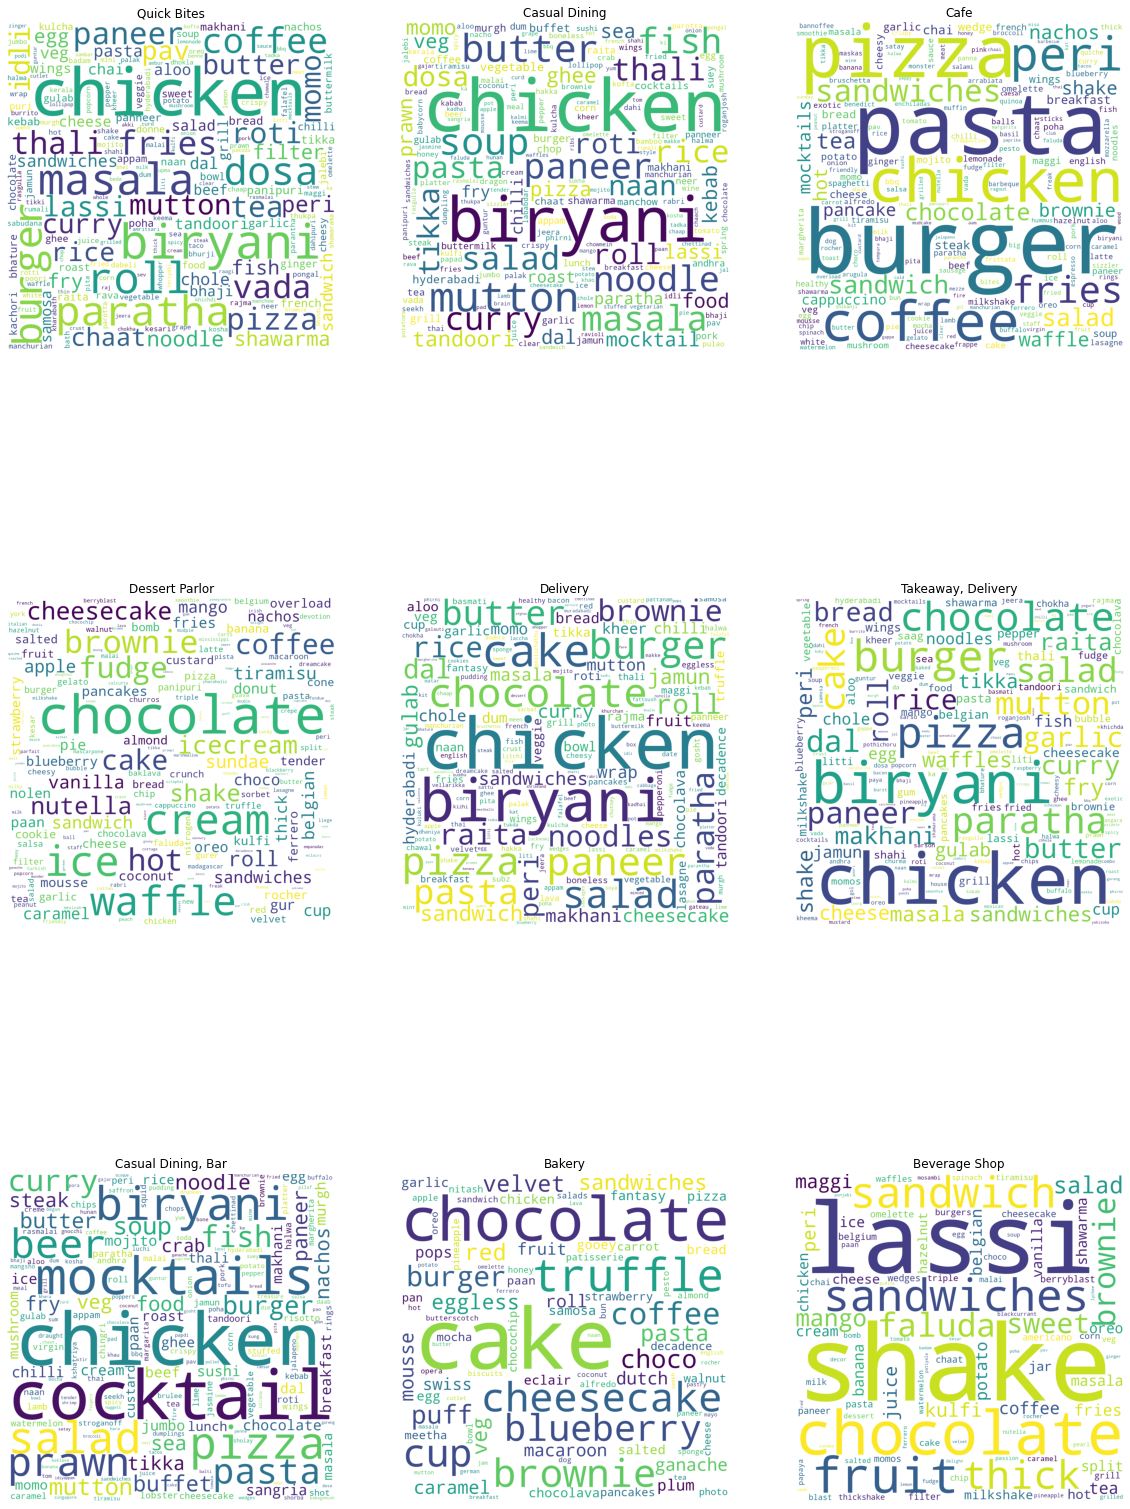

In [70]:
stopwords = set(STOPWORDS) 
produce_wordcloud(rest)

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">WordCloud for reviews:</h1>

In [71]:
def reviewwords(restaurant):
    dataset=dfupd[dfupd['rest_type']==restaurant]
    total_review=' '
    for review in dataset['reviews_list']:
        review=review.lower()
        review=re.sub('[^a-zA-Z]', ' ',review)
        review=re.sub('rated', ' ',review)
        review=re.sub('x',' ',review)
        review=re.sub(' +',' ',review)
        total_review=total_review + str(review)
    wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = set(STOPWORDS), 
            min_font_size = 10).generate(total_review) 
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8)) 
    plt.imshow(wordcloud) 
    plt.axis("off")

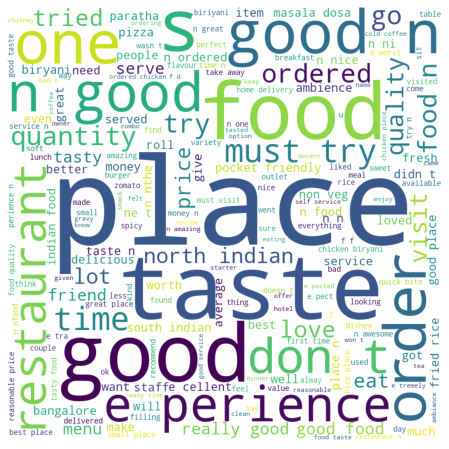

In [72]:
reviewwords('Quick Bites')

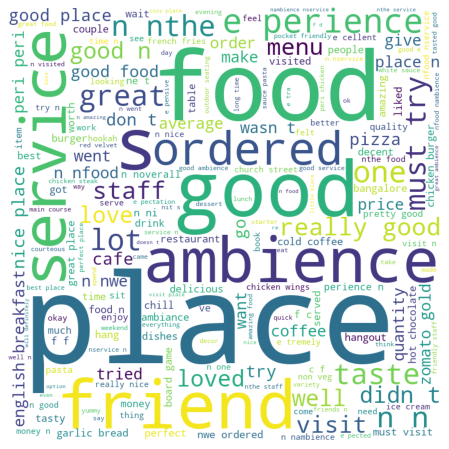

In [73]:
reviewwords('Cafe')

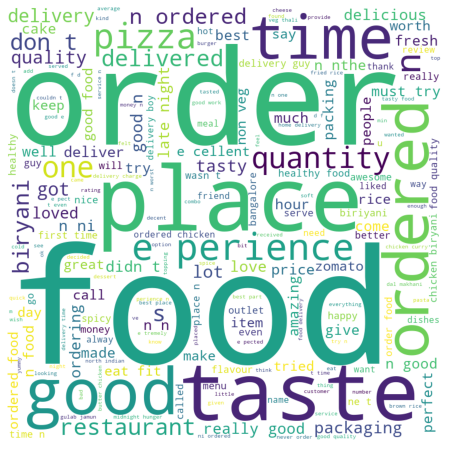

In [74]:
reviewwords('Delivery')

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Count of total Restaurants in each Locations:</h1>


In [75]:
fig=px.bar(x=df['city'].unique(),y=df['city'].value_counts(),labels=dict(x="City Name",y="Total Count"),color_continuous_scale="Agsunset",color=df['city'].unique())
fig.update_layout(title="Location wise counts for Restaurants ",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=2, opacity=1)
fig.show()

In [76]:
df2=df.copy()
df2.dropna(how='any',inplace=True)

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Loaction wise ratings of Restaurants: </h1>

In [77]:
loc_plt=pd.crosstab(df2['rating'],df2['city'])
fig=px.bar(loc_plt,x=loc_plt.index,y=loc_plt.columns,barmode='stack',opacity=1)
fig.update_layout(title="Location wise Rating",
                  titlefont={'size': 30},
                  template='simple_white'       
                  )
fig.update_traces(marker_line_color='black',
                  marker_line_width=0.5, opacity=0.8)
fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Number of Restaurants based on Services:</h1>

In [78]:
fig=px.histogram(df['type'],labels=dict(value='Type'))
fig.update_layout(title="Type of Services",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Count of Restaurants based on the Cost</h1>

In [79]:
fig=px.histogram(df['cost'],labels=dict(value='Cost Range'),nbins=10)
fig.update_layout(title="Cost of Restaurants",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces(marker_color='darkorange', marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Top 10 popular Restaurant Chains in Bengaluru</h1>

In [80]:
chains=df['name'].value_counts()[:10]
fig=px.bar(y=chains,x=chains.index,labels=dict(x='Name',y='Count'),color_continuous_scale="Agsunset",color=chains.index)
fig.update_layout(title="Most famous restaurant chains",
                  titlefont={'size': 30},template='simple_white'     
                  )
fig.update_traces( marker_line_color='black',
                  marker_line_width=2, opacity=1)

fig.show()

In [81]:
df2.isnull().sum()

url             0
address         0
name            0
online_order    0
book_table      0
rate            0
votes           0
phone           0
location        0
rest_type       0
dish_liked      0
cuisines        0
cost            0
reviews_list    0
menu_item       0
type            0
city            0
rating          0
dtype: int64

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">👨‍💻Modeling with Pycaret:</h1>

In [82]:
!pip install pycaret

     |████████████████████████████████| 261 kB 833 kB/s 
     |████████████████████████████████| 14.2 MB 5.7 MB/s 
     |████████████████████████████████| 102 kB 21.1 MB/s 
     |████████████████████████████████| 24.2 MB 19.3 MB/s 
     |████████████████████████████████| 6.8 MB 47.4 MB/s 
     |████████████████████████████████| 167 kB 38.3 MB/s 
     |████████████████████████████████| 1.1 MB 40.3 MB/s 
     |████████████████████████████████| 79 kB 6.1 MB/s 
     |████████████████████████████████| 54 kB 2.1 MB/s 
     |████████████████████████████████| 1.7 MB 47.5 MB/s 
  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - done
  Installing backend dependencies ... - \ | done
    Preparing wheel metadata ... - done
     |████████████████████████████████| 1.7 MB 37.5 MB/s 
  Created wheel for alembic: filename=alembic-1.4.1-py2.py3-none-any.whl size=158155 sha256=c647955155169aa529a33ea603d6319bcdbe6df31f4e26c82934930072dbb6aa
  St

In [83]:
train=Zom_df.iloc[:,[3,4,6,8,9,11,12,14,17]]
train.head()

online_order  book_table  votes  location  rest_type  cuisines   cost  \
0             0           0    775         0          0         0  800.0   
1             0           1    787         0          0         1  800.0   
2             0           1    918         0          1         2  800.0   
3             1           1     88         0          2         3  300.0   
4             1           1    166         1          0         4  600.0   

   menu_item  rating  
0          0     4.1  
1          0     4.1  
2          0     3.8  
3          0     3.7  
4          0     3.8

In [84]:
from pycaret.regression import *

In [85]:
exp = setup(data = train, target = 'rating', session_id=101,silent=True)

In [86]:
models()

Name  \
ID                                            
lr                        Linear Regression   
lasso                      Lasso Regression   
ridge                      Ridge Regression   
en                              Elastic Net   
lar                  Least Angle Regression   
llar           Lasso Least Angle Regression   
omp             Orthogonal Matching Pursuit   
br                           Bayesian Ridge   
ard       Automatic Relevance Determination   
par            Passive Aggressive Regressor   
ransac              Random Sample Consensus   
tr                       TheilSen Regressor   
huber                       Huber Regressor   
kr                             Kernel Ridge   
svm               Support Vector Regression   
knn                   K Neighbors Regressor   
dt                  Decision Tree Regressor   
rf                  Random Forest Regressor   
et                    Extra Trees Regressor   
ada                      AdaBoost Regressor   
gbr             Gradient Boosting Regressor   
mlp                           MLP Regressor   
xgboost           Extreme Gradient Boosting   
lightgbm    Light Gradient Boosting Machine   
catboost                 CatBoost Regressor   

                                                  Reference  Turbo  
ID                                                                  
lr              sklearn.linear_model._base.LinearRegression   True  
lasso        sklearn.linear_model._coordinate_descent.Lasso   True  
ridge                     sklearn.linear_model._ridge.Ridge   True  
en        sklearn.linear_model._coordinate_descent.Elast...   True  
lar                  sklearn.linear_model._least_angle.Lars   True  
llar            sklearn.linear_model._least_angle.LassoLars   True  
omp       sklearn.linear_model._omp.OrthogonalMatchingPu...   True  
br                sklearn.linear_model._bayes.BayesianRidge   True  
ard               sklearn.linear_model._bayes.ARDRegression  False  
par       sklearn.linear_model._passive_aggressive.Passi...   True  
ransac         sklearn.linear_model._ransac.RANSACRegressor  False  
tr        sklearn.linear_model._theil_sen.TheilSenRegressor  False  
huber            sklearn.linear_model._huber.HuberRegressor   True  
kr                         sklearn.kernel_ridge.KernelRidge  False  
svm                                sklearn.svm._classes.SVR  False  
knn       sklearn.neighbors._regression.KNeighborsRegressor   True  
dt              sklearn.tree._classes.DecisionTreeRegressor   True  
rf           sklearn.ensemble._forest.RandomForestRegressor   True  
et             sklearn.ensemble._forest.ExtraTreesRegressor   True  
ada       sklearn.ensemble._weight_boosting.AdaBoostRegr...   True  
gbr          sklearn.ensemble._gb.GradientBoostingRegressor   True  
mlp       sklearn.neural_network._multilayer_perceptron....  False  
xgboost                        xgboost.sklearn.XGBRegressor   True  
lightgbm                     lightgbm.sklearn.LGBMRegressor   True  
catboost                    catboost.core.CatBoostRegressor   True

In [87]:
top3 = compare_models(n_select = 3,exclude = ['xgboost','catboost'])

<h1 style="background-color:#FF85A3;font-size:20px;color:#00033E;font-weight : bold">Visualizing Model Performance:</h1>

In [88]:
rf = create_model('rf', fold = 5,verbose=False)
et = create_model('et', fold = 5,verbose=False)
dt = create_model('dt', fold = 5,verbose=False)

In [89]:
plot_model(rf,plot='residuals')

In [90]:
plot_model(rf,plot='error')

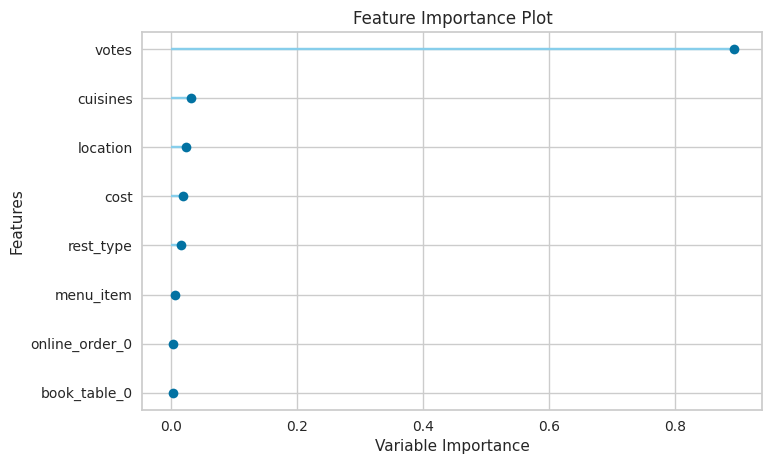

In [91]:
plot_model(rf,plot='feature')

In [92]:
plot_model(rf,plot='parameter')

Parameters
bootstrap                      True
ccp_alpha                       0.0
criterion                       mse
max_depth                      None
max_features                   auto
max_leaf_nodes                 None
max_samples                    None
min_impurity_decrease           0.0
min_impurity_split             None
min_samples_leaf                  1
min_samples_split                 2
min_weight_fraction_leaf        0.0
n_estimators                    100
n_jobs                           -1
oob_score                     False
random_state                    101
verbose                           0
warm_start                    False

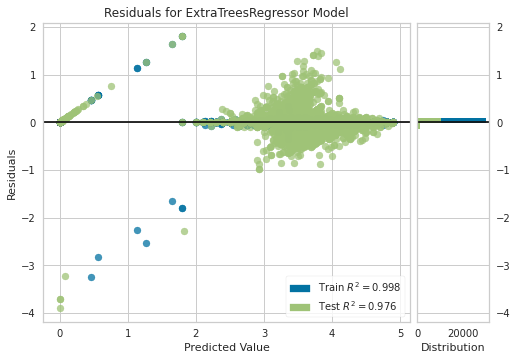

In [93]:
plot_model(et,plot='residuals')

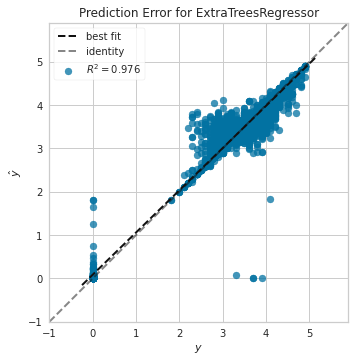

In [94]:
plot_model(et,plot='error')

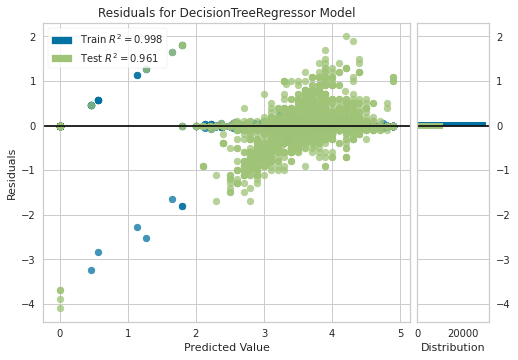

In [95]:
plot_model(dt,plot='residuals')

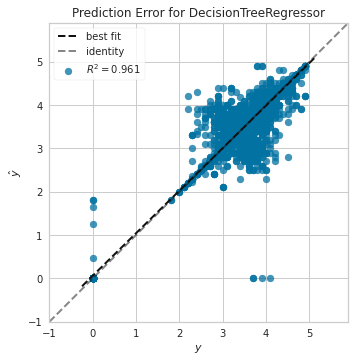

In [96]:
plot_model(dt,plot='error')

![](https://media.tenor.com/images/218f408b75e6fd13324cbd1fe3981295/tenor.gif)

# **Do upvote if you like my work**